# Finance of the helthcare system in Switzerland

## Import the new dataset
The new dataset is part of the table 14.05.01.01 of the Bundesamt für Statistik


In [1]:
from matplotlib import pyplot as plt
from pywaffle import Waffle
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_fin = pd.read_csv("healthcare_finance.csv",sep=';')
df_fin.columns = ['year', 'cost_M', 'cost_95', 'GDP_M', 'GDP_95', 'cost_%GDP', 'pop_T', 'expend_persmonth', 'fin_state%', 'fin_okp%', 'fin_socin%', 'fin_privin%', 'self_pay%']
df_fin = df_fin.drop([25, 26])
df_fin.head()

,year,cost_M,cost_95,GDP_M,GDP_95,cost_%GDP,pop_T,expend_persmonth,fin_state%,fin_okp%,fin_socin%,fin_privin%,self_pay%
0,1995.0,36 056,100.0,417 579,100.0,8.6,7 081,424.0,14.6,28.4,12.3,12.9,31.8
1,1996.0,37 773,104.8,420 822,100.8,9.0,7 105,443.0,14.6,29.9,11.9,12.8,30.8
2,1997.0,38 544,106.9,428 310,102.6,9.0,7 113,452.0,14.2,30.8,12.1,12.1,30.9
3,1998.0,40 077,111.2,440 569,105.5,9.1,7 132,468.0,13.7,31.4,12.2,12.0,30.7
4,1999.0,41 330,114.6,448 437,107.4,9.2,7 167,481.0,14.0,31.7,12.2,11.4,30.7


Explanation of the data:
* cost_M: cost in MCHF
* cost_95: cost with Index 1995 = 0
* GDP_M: GDP in MCHF
* GDP_95: GDP with Index 1995 = 0
* cost_%GDP: cost in % of the GDP
* pop_T: Average population in Thousand
* expend_persmonth: Expend per person and month
* fin_state%: financed by state %
* fin_okp%: financed by mandatory health insurance %
* fin_socin%: financed by social insurance %
* fin_privin%: financed by private insurance %
* self_pay%: selfpayment in %

Clean the data: cost_M, GDP_M and pop_T are objects because they have spaces.
* replace the spaces
* Change to int

In [3]:
print(df_fin.dtypes)

year                float64
cost_M               object
cost_95             float64
GDP_M                object
GDP_95              float64
cost_%GDP           float64
pop_T                object
expend_persmonth    float64
fin_state%          float64
fin_okp%            float64
fin_socin%          float64
fin_privin%         float64
self_pay%           float64
dtype: object


In [4]:
df_fin.cost_M = df_fin.cost_M.str.replace(" ","")
df_fin.GDP_M = df_fin.GDP_M.str.replace(" ","")
df_fin.pop_T = df_fin.pop_T.str.replace(" ","")
df_fin[["cost_M", "GDP_M", "pop_T"]] = df_fin[["cost_M", "GDP_M", "pop_T"]].astype(str).astype(int)
print(df_fin.dtypes)

year                float64
cost_M                int32
cost_95             float64
GDP_M                 int32
GDP_95              float64
cost_%GDP           float64
pop_T                 int32
expend_persmonth    float64
fin_state%          float64
fin_okp%            float64
fin_socin%          float64
fin_privin%         float64
self_pay%           float64
dtype: object


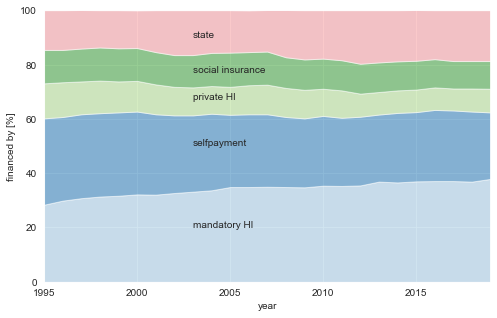

In [41]:
fig1, ax = plt.subplots(figsize=(8,5))

sns.set_style('darkgrid')

pal = sns.color_palette("Paired")

labels=['mandatory HI',
                     'selfpayment',
                     'private HI',
                     'social insurance',
                     'state']

ax.stackplot(df_fin["year"], 
             df_fin["fin_okp%"],
             df_fin["self_pay%"],
             df_fin["fin_privin%"], 
             df_fin["fin_socin%"],         
             df_fin["fin_state%"],
             colors=pal, alpha=0.5, visible=True)

ax.text(2003, 20, labels[0])
ax.text(2003, 50, labels[1])
ax.text(2003, 67, labels[2])
ax.text(2003, 77, labels[3])
ax.text(2003, 90, labels[4])

#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), facecolor='white')

ax.margins(0,0)
#plt.title('healthcare financing in Switzerland')
plt.ylabel("financed by [%]")
plt.xlabel("year")
fig1.savefig('finance_overview.png', bbox_inches='tight')
plt.show()

In [6]:
year_cat = pd.cut(df_fin.year, bins=[1994, 1999, 2004, 2009, 2014, 2019], 
                  labels=["1995-1999", "2000-2004", "2005-2009", "2010-2015", "2015-2019"])
df_fin.insert(1,"year_cat", year_cat)

In [7]:
df_median = df_fin.groupby('year_cat')[['fin_okp%', 'self_pay%', 'fin_privin%', 'fin_socin%', 'fin_state%']].median().reset_index()
df_median

,year_cat,fin_okp%,self_pay%,fin_privin%,fin_socin%,fin_state%
0,1995-1999,30.8,30.8,12.1,12.2,14.2
1,2000-2004,32.7,28.6,10.5,11.9,15.7
2,2005-2009,34.9,26.6,10.7,12.2,15.6
3,2010-2015,35.5,25.3,8.5,11.0,18.8
4,2015-2019,37.1,25.8,8.3,10.2,18.7


In [8]:
df_fin[df_fin['year']==1995]

,year,year_cat,cost_M,cost_95,GDP_M,GDP_95,cost_%GDP,pop_T,expend_persmonth,fin_state%,fin_okp%,fin_socin%,fin_privin%,self_pay%
0,1995.0,1995-1999,36056,100.0,417579,100.0,8.6,7081,424.0,14.6,28.4,12.3,12.9,31.8


In [45]:
year_cat3 = pd.cut(df_fin.year, bins=[1994, 2003, 2011, 2019], 
                  labels=["1995-2003", "2004-2011", "2012-2019"])
df_fin.insert(1,"year_cat3", year_cat3)
df_median2 = df_fin.groupby('year_cat2')[['fin_okp%', 'self_pay%', 'fin_privin%', 'fin_socin%', 'fin_state%']].median().reset_index()
df_median2

,year_cat2,fin_okp%,self_pay%,fin_privin%,fin_socin%,fin_state%
0,1995-2003,31.70,30.70,11.4,12.10,14.60
1,2004-2011,34.90,26.20,10.4,11.75,16.55
2,2012-2019,36.95,25.55,8.3,10.50,18.70


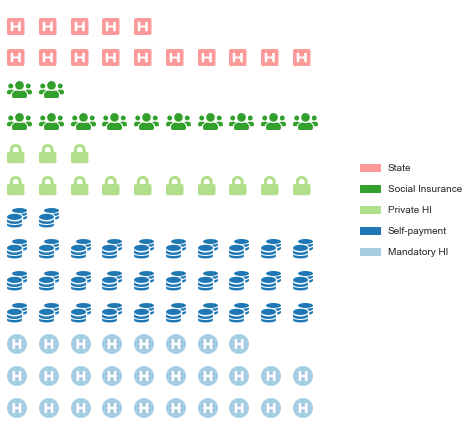

In [9]:
fig0 = plt.figure(
    FigureClass=Waffle, 
    columns=10, 
    values={"Mandatory HI": 28,"Self-payment":  32,"Private HI":  13,"Social Insurance": 12,"State": 15},
    icons = ['hospital-symbol','coins','lock','users','h-square'],
    #icon_legend= True,
    font_size = 20,
    block_arranging_style='new-line',
    vertical=True,
    cmap_name="Paired",
    #title={'label': 'Healthcare financing 1995', 'loc': 'left'},
    figsize=(5,6),
    legend={'loc': 'center left', 'bbox_to_anchor': (1.1, 0.5), 'labelspacing': -3,'frameon': False}
)

fig0.savefig('waffle_1995.png', bbox_inches='tight')

plt.show()


In [11]:
df_fin[df_fin['year']==2019]

,year,year_cat,cost_M,cost_95,GDP_M,GDP_95,cost_%GDP,pop_T,expend_persmonth,fin_state%,fin_okp%,fin_socin%,fin_privin%,self_pay%
24,2019.0,2015-2019,82080,227.6,726921,174.1,11.3,8575,798.0,18.7,37.9,10.2,8.7,24.5


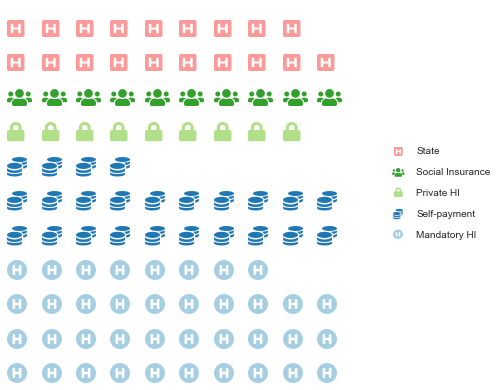

In [12]:
fig3 = plt.figure(
    FigureClass=Waffle, 
    columns=10, 
    values={"Mandatory HI": 38, "Self-payment": 24, "Private HI": 9, "Social Insurance": 10, "State": 19},
    icons = ['hospital-symbol','coins','lock','users','h-square'],
    icon_legend= True,
    font_size = 20,
    block_arranging_style='new-line',
    vertical=True,
    cmap_name="Paired",
    #title={'label': 'Healthcare financing 2019', 'loc': 'left'},
    figsize=(5,6),
    legend={'loc': 'center left', 'bbox_to_anchor': (1.1, 0.5), 'labelspacing': -3, 'frameon': False}
)
fig3.savefig('waffle_2019.png', bbox_inches='tight')

plt.show()

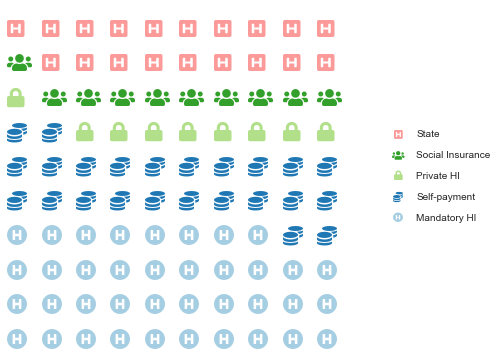

In [14]:
fig3 = plt.figure(
    FigureClass=Waffle, 
    columns=10, 
    values={"Mandatory HI": 38, "Self-payment": 24, "Private HI": 9, "Social Insurance": 10, "State": 19},
    icons = ['hospital-symbol','coins','lock','users','h-square'],
    icon_legend= True,
    font_size = 20,
    #block_arranging_style='new-line',
    vertical=True,
    cmap_name="Paired",
    #title={'label': 'Healthcare financing 2019', 'loc': 'left'},
    figsize=(5,6),
    legend={'loc': 'center left', 'bbox_to_anchor': (1.1, 0.5), 'labelspacing': -3, 'frameon': False}
)
fig3.savefig('waffle_2019.png', bbox_inches='tight')

plt.show()

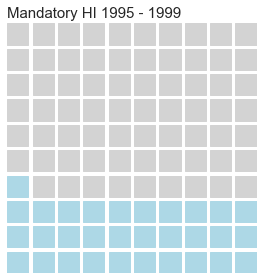

In [16]:
fig5a = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns = 10,
    values=[31, 69],
    vertical=True,
    colors=["lightblue", "lightgray"],
    font_size=24,
    title={'label': 'Mandatory HI 1995 - 1999', 'loc': 'left', 'fontsize': 15},
)

fig5a.savefig('mHI_1.png', bbox_inches='tight')
plt.show()

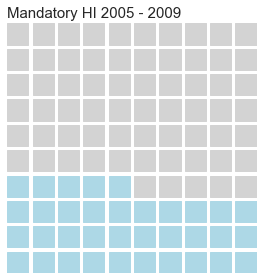

In [17]:
fig5b = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns = 10,
    values=[35, 65],
    vertical=True,
    colors=["lightblue", "lightgray"],
    font_size=24,
    title={'label': 'Mandatory HI 2005 - 2009', 'loc': 'left', 'fontsize': 15},
)
fig5b.savefig('mHI_2.png', bbox_inches='tight')
plt.show()

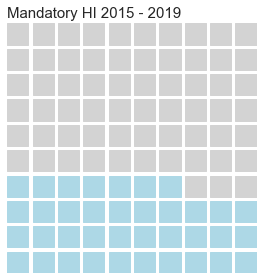

In [18]:
fig5c = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns = 10,
    values=[37, 63],
    vertical=True,
    colors=["lightblue", "lightgray"],
    font_size=24,
    title={'label': 'Mandatory HI 2015 - 2019', 'loc': 'left', 'fontsize': 15},
)
fig5c.savefig('mHI_3.png', bbox_inches='tight')
plt.show()

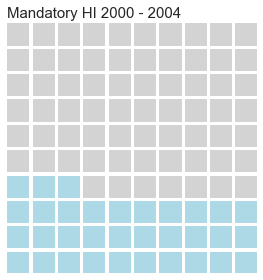

In [19]:
fig5d = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns = 10,
    values=[33, 67],
    vertical=True,
    colors=["lightblue", "lightgray"],
    font_size=24,
    title={'label': 'Mandatory HI 2000 - 2004', 'loc': 'left', 'fontsize': 15},
)

fig5d.savefig('mHI_4.png', bbox_inches='tight')
plt.show()

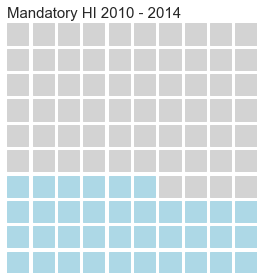

In [20]:
fig5e = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns = 10,
    values=[36, 64],
    vertical=True,
    colors=["lightblue", "lightgray"],
    font_size=24,
    title={'label': 'Mandatory HI 2010 - 2014', 'loc': 'left', 'fontsize': 15},
)

fig5e.savefig('mHI_5.png', bbox_inches='tight')
plt.show()

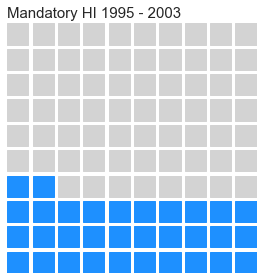

In [47]:
fig6a = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns = 10,
    values=[32, 68],
    vertical=True,
    colors=["dodgerblue", "lightgray"],
    font_size=24,
    title={'label': 'Mandatory HI 1995 - 2003', 'loc': 'left', 'fontsize': 15},
)
fig6a.savefig('mHI_a.png', bbox_inches='tight')
plt.show()


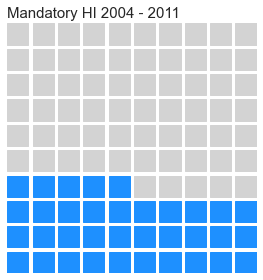

In [49]:
fig6c = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns = 10,
    values=[35, 65],
    vertical=True,
    colors=["dodgerblue", "lightgray"],
    font_size=24,
    title={'label': 'Mandatory HI 2004 - 2011', 'loc': 'left', 'fontsize': 15},
)
fig6c.savefig('mHI_b.png', bbox_inches='tight')
plt.show()

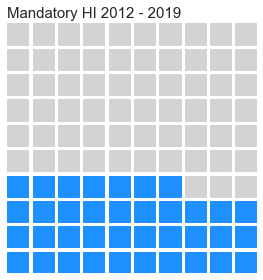

In [48]:
fig6d = plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns = 10,
    values=[37, 63],
    vertical=True,
    colors=["dodgerblue", "lightgray"],
    font_size=24,
    title={'label': 'Mandatory HI 2012 - 2019', 'loc': 'left', 'fontsize': 15},
)
fig6d.savefig('mHI_c.png', bbox_inches='tight')
plt.show()

In [26]:
df_m1 = df_median.T
df_m1.columns = df_m1.iloc[0]
df_m1 = df_m1.drop(df_m1.index[0])
df_m1['change'] = (df_m1["2015-2019"] - df_m1["1995-1999"])/df_m1["1995-1999"]*100
df_m1

year_cat,1995-1999,2000-2004,2005-2009,2010-2015,2015-2019,change
fin_okp%,30.8,32.7,34.9,35.5,37.1,20.4545
self_pay%,30.8,28.6,26.6,25.3,25.8,-16.2338
fin_privin%,12.1,10.5,10.7,8.5,8.3,-31.405
fin_socin%,12.2,11.9,12.2,11,10.2,-16.3934
fin_state%,14.2,15.7,15.6,18.8,18.7,31.6901


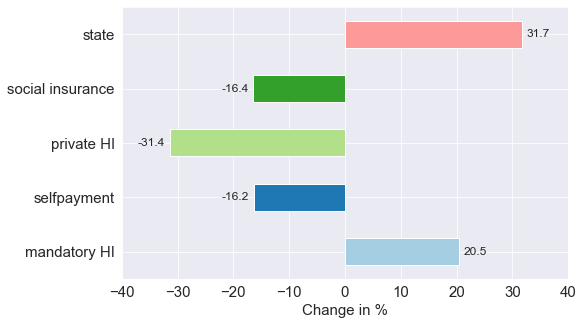

In [27]:
m1_series = pd.Series(df_m1['change'])

y_labels = ['mandatory HI',
                     'selfpayment',
                     'private HI',
                     'social insurance',
                     'state'] 

# Plot the figure.
fig7 = plt.figure(figsize=(8, 5))
ax = m1_series.plot(kind='barh', color=plt.cm.Paired(np.arange(len(df_m1))), fontsize=15)
#ax.set_title('Change between 1995 - 2019', fontsize=15)
ax.set_xlabel('Change in %', fontsize=15)
ax.set_yticklabels(y_labels)
ax.set_xlim(-40, +40) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        size=12)                      # Horizontally align label differently for
                                   # positive and negative values.

fig7.savefig('fin_change.png', bbox_inches='tight')       
plt.show()

In [28]:
df_m2 = df_fin.iloc[['0', '24']]
df_m2 = df_m2[['fin_okp%', 'self_pay%', 'fin_privin%', 'fin_socin%', 'fin_state%']]
df_m2 = df_m2.T

df_m2.head(6)
df_m2['change'] = (df_m2[24] - df_m2[0])/df_m2[0]*100
df_m2.head(6)


,0,24,change
fin_okp%,28.4,37.9,33.450704
self_pay%,31.8,24.5,-22.955975
fin_privin%,12.9,8.7,-32.558140
fin_socin%,12.3,10.2,-17.073171
fin_state%,14.6,18.7,28.082192


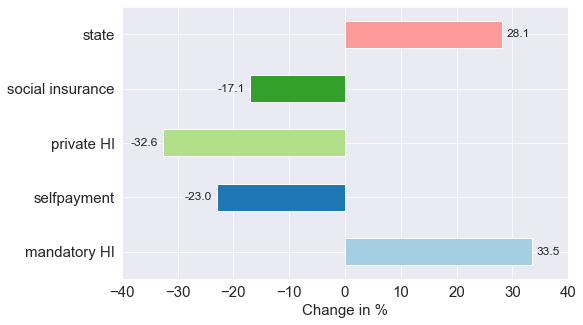

In [29]:
m2_series = pd.Series(df_m2['change'])

y_labels = ['mandatory HI',
                     'selfpayment',
                     'private HI',
                     'social insurance',
                     'state'] 

# Plot the figure.
fig8 = plt.figure(figsize=(8, 5))
ax = m2_series.plot(kind='barh', color=plt.cm.Paired(np.arange(len(df_m1))), fontsize=15)
#ax.set_title('Change between 1995 - 2019', fontsize=15)
ax.set_xlabel('Change in %', fontsize=15)
ax.set_yticklabels(y_labels)
ax.set_xlim(-40, +40) # expand xlim to make labels easier to read

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,
        size=12)                      # Horizontally align label differently for
                                   # positive and negative values.

fig8.savefig('fin_change1.png', bbox_inches='tight')       
plt.show()